In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
conductores = pd.read_csv('/content/datos_conductor.csv')#,index_col='id_conductor' )
conductores.head()

,id_conductor,edad_conductor,experiencia_conductor,accidentes_previos,kilometros_anuales
0,0,18.0,0.0,1.0,11.0
1,1,19.0,1.0,5.0,15.0
2,2,58.0,23.0,3.0,20.0
3,3,20.0,2.0,1.0,23.0
4,4,45.0,25.0,3.0,21.0


In [ ]:
vehiculos = pd.read_csv('/content/datos_vehículo.csv')#, index_col='id_conductor')
vehiculos.head()

,id_conductor,modelo_vehículo,edad_vehículo,prima
0,0,2021.0,4.0,499.777694
1,1,2015.0,10.0,507.027480
2,2,2018.0,7.0,489.600131
3,3,1997.0,28.0,496.658024
4,4,1996.0,29.0,492.000720


In [ ]:
print(f'El dataset de vehículos posee {len(vehiculos)} registros.\nMientras que el de conductores, {len(conductores)}')

El dataset de vehículos posee 1007 registros.
Mientras que el de conductores, 1004


Noté que el dataframe de vehículos tiene tres vehículos de más que no tienen su par en el dataframe de conductores. Por lo tanto tomé la decisión de eliminarlos para poder luego unir los dataframe. No es grave perder esos tres datos porque son pocos en relación a la cantidad total de datos.

Para este fin, es más simple, para no tener que luego quitar columnas repetidas, directamente asignarles como índice a los dos 'id_conductor' y luego unirlos

In [ ]:
vehiculos = pd.read_csv('/content/datos_vehículo.csv')#, index_col='id_conductor')
vehiculos.head()

,id_conductor,modelo_vehículo,edad_vehículo,prima
0,0,2021.0,4.0,499.777694
1,1,2015.0,10.0,507.027480
2,2,2018.0,7.0,489.600131
3,3,1997.0,28.0,496.658024
4,4,1996.0,29.0,492.000720


In [ ]:
conductores = pd.read_csv('/content/datos_conductor.csv')#,index_col='id_conductor' )
conductores.head()

,id_conductor,edad_conductor,experiencia_conductor,accidentes_previos,kilometros_anuales
0,0,18.0,0.0,1.0,11.0
1,1,19.0,1.0,5.0,15.0
2,2,58.0,23.0,3.0,20.0
3,3,20.0,2.0,1.0,23.0
4,4,45.0,25.0,3.0,21.0


In [ ]:
vehiculos.index.equals(conductores.index)

False

In [ ]:
vehiculos = vehiculos.drop(vehiculos[vehiculos.index > 1003].index)
vehiculos.index.equals(conductores.index)

True

In [ ]:
df = pd.concat([vehiculos, conductores], axis=1)

## Análisis de los dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_conductor           1004 non-null   int64  
 1   modelo_vehículo        1004 non-null   float64
 2   edad_vehículo          1004 non-null   float64
 3   prima                  1004 non-null   float64
 4   id_conductor           1004 non-null   int64  
 5   edad_conductor         1004 non-null   float64
 6   experiencia_conductor  1004 non-null   float64
 7   accidentes_previos     1004 non-null   float64
 8   kilometros_anuales     1004 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 70.7 KB


In [ ]:
df.describe()

,id_conductor,modelo_vehículo,edad_vehículo,prima,id_conductor,edad_conductor,experiencia_conductor,accidentes_previos,kilometros_anuales
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,501.500000,2007.667331,17.332669,493.565901,501.500000,41.476096,14.840637,2.579681,17.929283
std,289.974137,10.367662,10.367662,11.911811,289.974137,13.857501,10.621209,1.710511,4.404518
min,0.000000,1990.000000,0.000000,304.200000,0.000000,0.000000,0.000000,0.000000,11.000000
25%,250.750000,1999.000000,8.000000,489.273830,250.750000,30.000000,6.000000,1.000000,14.000000
50%,501.500000,2008.000000,17.000000,493.738148,501.500000,42.000000,13.000000,3.000000,18.000000
75%,752.250000,2017.000000,26.000000,498.160793,752.250000,53.000000,23.000000,4.000000,22.000000
max,1003.000000,2025.000000,35.000000,679.300000,1003.000000,65.000000,50.000000,8.000000,25.000000


In [ ]:
df.isna().sum()

,0
id_conductor,0
modelo_vehículo,0
edad_vehículo,0
prima,0
id_conductor,0
edad_conductor,0
experiencia_conductor,0
accidentes_previos,0
kilometros_anuales,0


In [ ]:
df[vehiculos.index.duplicated(keep=False)]

,id_conductor,modelo_vehículo,edad_vehículo,prima,id_conductor,edad_conductor,experiencia_conductor,accidentes_previos,kilometros_anuales


el dataframe no posee valores duplicados

In [ ]:
df.columns

Index(['id_conductor', 'modelo_vehículo', 'edad_vehículo', 'prima',
       'id_conductor', 'edad_conductor', 'experiencia_conductor',
       'accidentes_previos', 'kilometros_anuales'],
      dtype='object')

In [ ]:
df['edad_de_inicio'] = df['edad_conductor'] - df['experiencia_conductor']

In [ ]:
df[df['edad_de_inicio'] < 18]

,id_conductor,modelo_vehículo,edad_vehículo,prima,id_conductor,edad_conductor,experiencia_conductor,accidentes_previos,kilometros_anuales,edad_de_inicio
157,157,2023.0,2.0,679.30,157,12.0,25.0,3.0,14.0,-13.0
356,356,2020.0,5.0,340.28,356,40.0,50.0,4.0,16.0,-10.0
496,496,2001.0,24.0,579.36,496,15.0,27.0,7.0,18.0,-12.0
823,823,2017.0,8.0,304.20,823,0.0,39.0,8.0,20.0,-39.0


In [ ]:
df[df['edad_conductor'] <	df['experiencia_conductor']]

,id_conductor,modelo_vehículo,edad_vehículo,prima,id_conductor,edad_conductor,experiencia_conductor,accidentes_previos,kilometros_anuales,edad_de_inicio
157,157,2023.0,2.0,679.30,157,12.0,25.0,3.0,14.0,-13.0
356,356,2020.0,5.0,340.28,356,40.0,50.0,4.0,16.0,-10.0
496,496,2001.0,24.0,579.36,496,15.0,27.0,7.0,18.0,-12.0
823,823,2017.0,8.0,304.20,823,0.0,39.0,8.0,20.0,-39.0


Viendo el mínimo que podía tomar la variable edad_de_inicio se encontró que hay un registro de un conductor con edad 0. Como esto no es posible, surge la inquietud de encontrar otros valores incorrectos. Se considera valores incorrectos a aquellos en que el conductor tiene más experiencia que edad o que es menor a 18 años. Ambas condiciones devuelven los mismos registros.

In [ ]:
df[df['edad_conductor'] < df['experiencia_conductor']]

,id_conductor,modelo_vehículo,edad_vehículo,prima,id_conductor,edad_conductor,experiencia_conductor,accidentes_previos,kilometros_anuales,edad_de_inicio
157,157,2023.0,2.0,679.30,157,12.0,25.0,3.0,14.0,-13.0
356,356,2020.0,5.0,340.28,356,40.0,50.0,4.0,16.0,-10.0
496,496,2001.0,24.0,579.36,496,15.0,27.0,7.0,18.0,-12.0
823,823,2017.0,8.0,304.20,823,0.0,39.0,8.0,20.0,-39.0


In [ ]:
df.loc[df['edad_conductor'] < df['experiencia_conductor'], 'edad_conductor'] = np.nan

In [ ]:
df = df.dropna().reset_index()

In [ ]:
df['edad_de_inicio'].describe()

,edad_de_inicio
count,1000.00000
mean,26.81600
std,11.14479
min,18.00000
25%,18.00000
50%,21.00000
75%,34.00000
max,65.00000


In [ ]:
bins = [0, 9.1, 20, np.inf]
labels = ["Principiantes", 'Intermedios', 'Experimentados']

df['grupo_experiencia'] = pd.cut(df['experiencia_conductor'], bins, labels=labels, right=False)

In [ ]:
df

,index,id_conductor,modelo_vehículo,edad_vehículo,prima,id_conductor,edad_conductor,experiencia_conductor,accidentes_previos,kilometros_anuales,edad_de_inicio,grupo_experiencia
0,0,0,2021.0,4.0,499.777694,0,18.0,0.0,1.0,11.0,18.0,Principiantes
1,1,1,2015.0,10.0,507.027480,1,19.0,1.0,5.0,15.0,18.0,Principiantes
2,2,2,2018.0,7.0,489.600131,2,58.0,23.0,3.0,20.0,35.0,Experimentados
3,3,3,1997.0,28.0,496.658024,3,20.0,2.0,1.0,23.0,18.0,Principiantes
4,4,4,1996.0,29.0,492.000720,4,45.0,25.0,3.0,21.0,20.0,Experimentados
...,...,...,...,...,...,...,...,...,...,...,...,...
995,999,999,1996.0,29.0,494.474662,999,43.0,14.0,1.0,13.0,29.0,Intermedios
996,1000,1000,1991.0,34.0,493.381601,1000,33.0,15.0,3.0,24.0,18.0,Intermedios
997,1001,1001,2012.0,13.0,485.842752,1001,60.0,37.0,5.0,23.0,23.0,Experimentados
998,1002,1002,2024.0,1.0,499.533029,1002,25.0,4.0,4.0,12.0,21.0,Principiantes


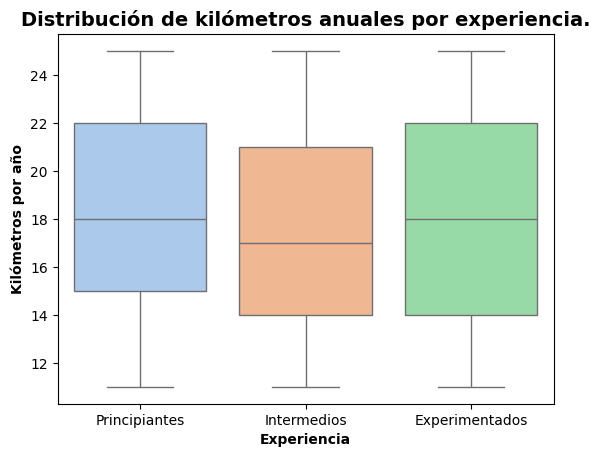

In [ ]:
sns.boxplot(data=df, x='grupo_experiencia', y='kilometros_anuales', hue='grupo_experiencia', palette='pastel')
plt.title("Distribución de kilómetros anuales por experiencia", fontsize=14, weight='bold')
plt.ylabel("Kilómetros por año", weight='bold')
plt.xlabel("Experiencia", weight='bold')
plt.show()

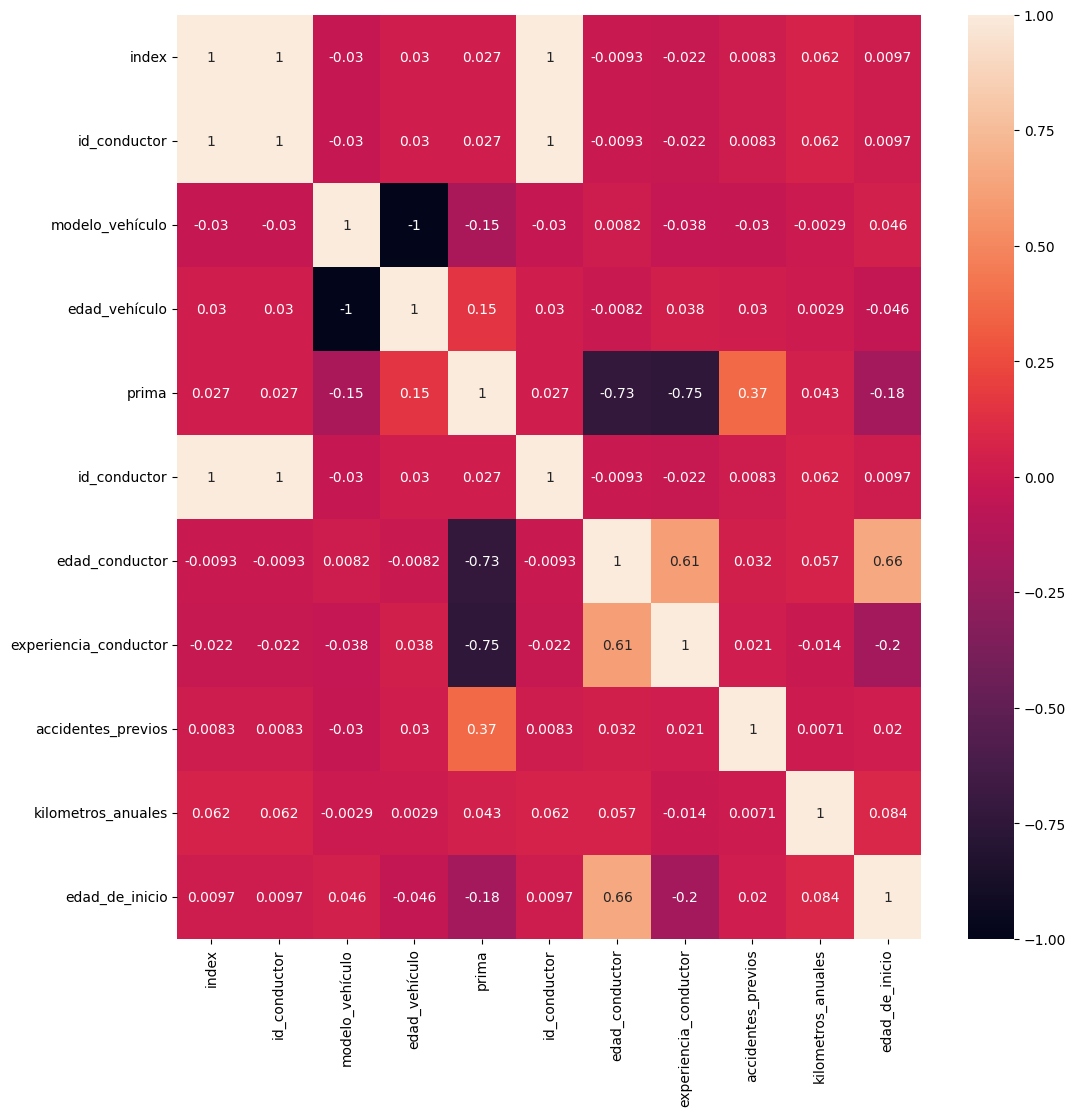

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.show()

In [ ]:
sns.pairplot(data=df.select_dtypes(include='number'), hue='grupo_experiencia', diag_kind='kde')

ValueError: Data must be 1-dimensional, got ndarray of shape (1000, 2) instead

In [ ]:
# Verifica si alguna columna contiene arrays
for col in df.columns:
    if df[col].dtype == 'object':
        sample_value = df[col].iloc[0]
        if hasattr(sample_value, 'shape'):
            print(f"Columna problemática: {col}, shape: {sample_value.shape}")

In [ ]:
print(df.info())
print(df.dtypes)

# Verifica si hay valores extraños
print(df.head())

# Busca columnas problemáticas
for col in df.columns:
    print(f"{col}: {type(df[col].iloc[0])}")

In [ ]:
df_clean = df.loc[:, ~df.columns.duplicated()]
print("Columnas después de eliminar duplicados:", df_clean.columns.tolist())

In [ ]:
# Identifica columnas problemáticas
for col in df_clean.columns:
    sample_value = df_clean[col].iloc[0]
    if isinstance(sample_value, pd.Series):
        print(f"Columna problemática encontrada: {col}")
        # Intenta extraer el primer valor si es una Serie
        df_clean[col] = df_clean[col].apply(lambda x: x.iloc[0] if isinstance(x, pd.Series) else x)

In [ ]:
df_clean = df.loc[:, ~df.columns.duplicated()]

# Paso 2: Corrige tipos de datos problemáticos
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        sample_value = df_clean[col].iloc[0]
        if isinstance(sample_value, pd.Series):
            print(f"Corrigiendo columna: {col}")
            df_clean[col] = df_clean[col].apply(lambda x: x.iloc[0] if isinstance(x, pd.Series) else x)

# Paso 3: Selecciona solo columnas numéricas + grupo_experiencia
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
cols_for_plot = numeric_cols + ['grupo_experiencia']

# Paso 4: Crea el pairplot
sns.pairplot(data=df_clean[cols_for_plot], hue='grupo_experiencia', diag_kind='kde')
plt.show()